## In- Class Assignment:
Himani- 10144554

## ALGORITHM TO BUILD A CNN MODEL BASED ON IMAGE DATA


`Import the neccessary libraries`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import tensorflow as tf


This code defines a class CNNImageClassifier for a Convolutional Neural Network (CNN) image classifier using TensorFlow and Keras

 The class includes methods to build the CNN model, load and preprocess the CIFAR-10 dataset, train the model, plot the training history, and save the trained model to a specified path. The architecture consists of two convolutional layers with max-pooling, followed by two fully connected layers, and the model is trained using categorical cross-entropy loss and the Adam optimizer

 The training progress is visualized using matplotlib during training, and the trained model is saved for future use.

In [8]:
class CNNImageClassifier:
    def __init__(self, input_shape, num_classes):
        self.model = self.build_model(input_shape, num_classes)

    def build_model(self, input_shape, num_classes):
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32') / 255
        x_test = x_test.astype('float32') / 255
        y_train = to_categorical(y_train, num_classes=10)
        y_test = to_categorical(y_test, num_classes=10)
        return x_train, y_train, x_test, y_test

    # Function to Train the CNN Model
    def train(self, x_train, y_train, x_test, y_test, epochs, batch_size):
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_data=(x_test, y_test))
        return history


# Visualization 
    def plot_history(self, history):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

    def save_model(self, path):
        self.model.save(path)    
        
        

A Convolutional Neural Network (CNN) image classifier is instantiated using the CNNImageClassifier class with specified parameters for input shape, number of classes, epochs, batch size, and a model save path. 

The script then loads the CIFAR-10 dataset, trains the CNN model on the training data, plots the training history, and finally saves the trained model to the specified path ("saved_model").

Epoch 1/30
782/782 [==============================] - 36s 16ms/step - loss: 1.4725 - accuracy: 0.4741 - val_loss: 1.2872 - val_accuracy: 0.5400
Epoch 2/30
782/782 [==============================] - 11s 15ms/step - loss: 1.1181 - accuracy: 0.6077 - val_loss: 1.0711 - val_accuracy: 0.6209
Epoch 3/30
782/782 [==============================] - 12s 15ms/step - loss: 0.9863 - accuracy: 0.6566 - val_loss: 0.9730 - val_accuracy: 0.6574
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 0.8828 - accuracy: 0.6951 - val_loss: 0.9198 - val_accuracy: 0.6794
Epoch 5/30
782/782 [==============================] - 11s 14ms/step - loss: 0.8011 - accuracy: 0.7226 - val_loss: 0.9059 - val_accuracy: 0.6885
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 0.7325 - accuracy: 0.7466 - val_loss: 0.8960 - val_accuracy: 0.6917
Epoch 7/30
782/782 [==============================] - 11s 14ms/step - loss: 0.6664 - accuracy: 0.7689 - val_loss: 0.8577 - val_accuracy:

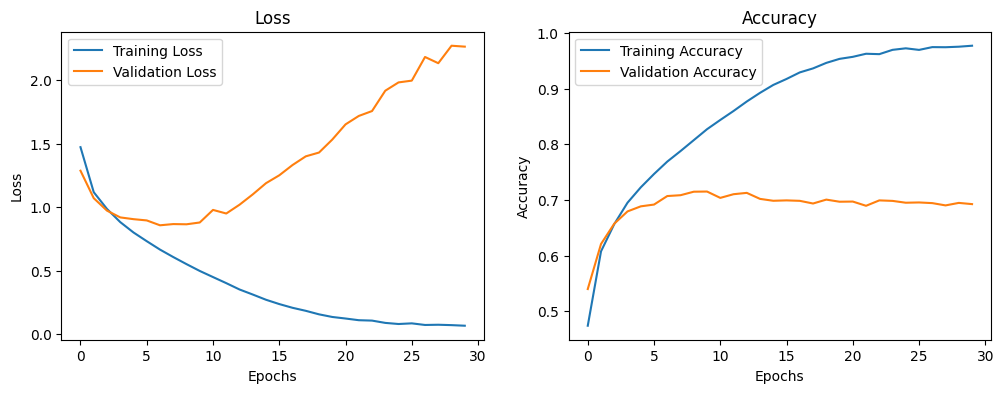

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [9]:
if __name__ == "__main__":
    input_shape = (32, 32, 3)
    num_classes = 10
    epochs = 30
    batch_size = 64
    model_save_path = "saved_model"

    classifier = CNNImageClassifier(input_shape, num_classes)
    x_train, y_train, x_test, y_test = classifier.load_data()

    history = classifier.train(x_train, y_train, x_test, y_test, epochs, batch_size)
    classifier.plot_history(history)

    # Save the trained model
    classifier.save_model(model_save_path)

We are loading a pre-trained Convolutional Neural Network (CNN) model saved in "saved_model" using TensorFlow and Keras. 

The model is then used to predict the class of an input image ("downdeer.jpeg") from the CIFAR-10 dataset.

The predicted class index is obtained and mapped to a corresponding class label from the CIFAR-10 label list, and the result is printed to the console.

In [22]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

def load_and_predict(model_path, image_path):
    # Load the saved model
    loaded_model = tf.keras.models.load_model(model_path)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values

    # Make a prediction
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index
    predicted_class = np.argmax(predictions)

    return predicted_class

if __name__ == "__main__":
    # Example usage
    saved_model_path = "saved_model"  # Update with the actual path where the model is saved
    image_path_to_predict = "deer.jpeg"  # Update with the actual image path


    # CIFAR-10 class labels
    cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
    
    predicted_class = load_and_predict(saved_model_path, image_path_to_predict)
    print("Predicted Class:", cifar10_labels[predicted_class])


1/1 [==============================] - 0s 197ms/step
Predicted Class: deer


# In Summary:
The provided code defines a CNN image classifier class using TensorFlow and Keras, utilizing the CIFAR-10 dataset. It includes methods for model construction, data loading, training, history visualization, and model saving

 The CNN architecture consists of convolutional and dense layers, demonstrating a comprehensive workflow for image classification tasks..